# 4.3 - Evaluación

### Silhoutte Score

$$S=\frac{b(v)-a(v)}{max(a,b)}$$

donde:

+ v:= vector de datos
+ a(v):=distancia media desde v al resto de vectores del mismo cluster
+ b(v):=distancia media desde v a los vectores del cluster más cercano



S pertenece al intervalo [-1,1], de tal manera que:

+ S=1  => buena clusterizacion
+ S=0  => overlapping
+ S=-1 => mala clusterizacion

In [1]:
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D


import numpy as np

In [68]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)

In [69]:
X=StandardScaler().fit_transform(X)

In [70]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [71]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

**plots**

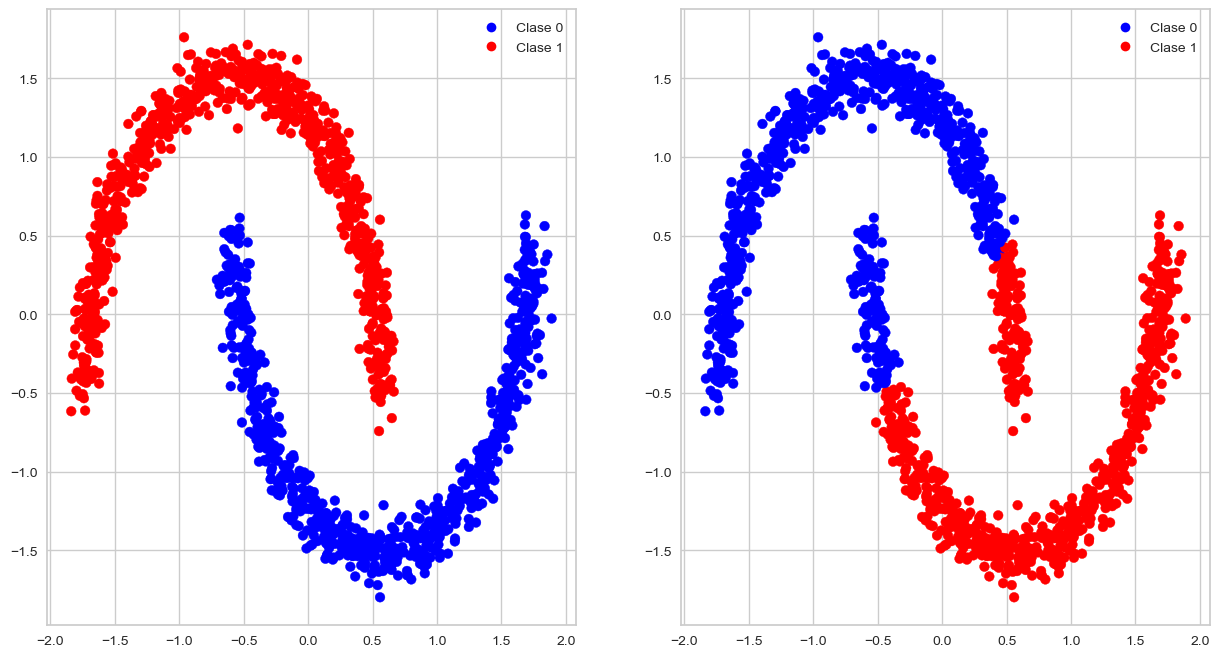

In [72]:
fig,ax = plt.subplots(1, 2, figsize=(15, 8))

colors=np.array(['blue', 'red'])

legend_e=[Line2D([0],[0], color=c, marker='o', linestyle='',
                 label='Clase {}'.format(i))  for i,c in enumerate(colors)]


ax[0].scatter(X[:,0], X[:, 1], color=colors[y1_pred])
ax[0].legend(handles=legend_e, loc='upper right')


ax[1].scatter(X[:,0], X[:, 1], color=colors[y2_pred])
ax[1].legend(handles=legend_e, loc='upper right');

In [73]:
from sklearn.metrics import silhouette_score

In [74]:
silhouette_score(X, y1_pred)

0.3919012826850594

In [75]:
print ('Modelo 1 - Hierarchical : Silhouette Score:{}'.format(silhouette_score(X, y1_pred)))
print ('Modelo 2 - KMeans       : Silhouette Score:{}'.format(silhouette_score(X, y2_pred)))

Modelo 1 - Hierarchical : Silhouette Score:0.3919012826850594
Modelo 2 - KMeans       : Silhouette Score:0.49908862276187027


In [77]:
from sklearn.metrics import silhouette_samples


silhouette_samples(X, y1_pred)[:10]

array([0.57275611, 0.46567586, 0.51200504, 0.4458272 , 0.39832954,
       0.36191131, 0.34461951, 0.61078924, 0.5893154 , 0.49092135])

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# Elbow

**nº óptimo de clusters**


![elbow](images/elbow.png)

$$WSS=Inercia=\sum_{i=0}^{n} min(|x_i - \bar{x}|^{2})$$

In [10]:
X,y=datasets.make_blobs(n_features=3, centers=2)

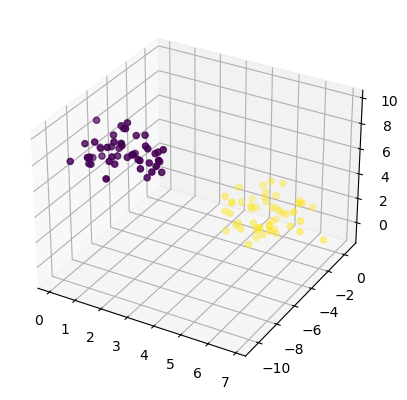

In [11]:
fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y);

In [12]:
cluster.KMeans(n_clusters=4).fit(X).inertia_

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


166.96143507740203

In [13]:
[cluster.KMeans(n_clusters=i+1).fit(X).inertia_ for i in range(10)]

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

[2875.0166167172383,
 245.52831720803317,
 203.77970006361983,
 166.96143507740203,
 140.4597064965342,
 121.69468349580299,
 107.21633923523403,
 95.08570698188245,
 86.97739237301302,
 78.16660614035305]

In [14]:
n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(X).inertia_) for k in range(1, 10)])

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

In [15]:
n_clusters, inercia

((1, 2, 3, 4, 5, 6, 7, 8, 9),
 (2875.0166167172383,
  245.52831720803317,
  203.66631937553703,
  167.06973242472944,
  140.64337650848375,
  121.28795276735045,
  106.71366152204817,
  95.08570698188245,
  88.69006470014786))

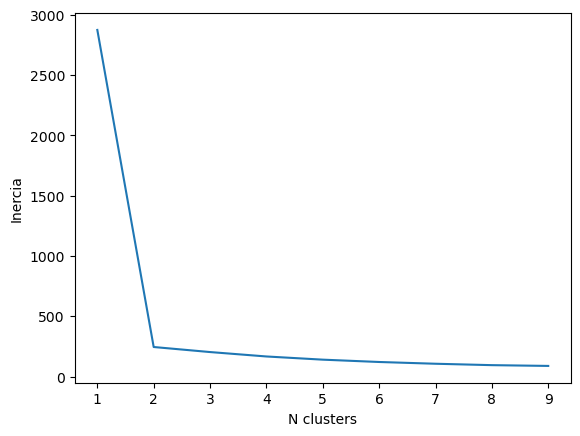

In [16]:
fig=plt.figure()

ax=fig.add_subplot()

ax.plot(n_clusters, inercia)

plt.xlabel('N clusters')
plt.ylabel('Inercia');

In [17]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [18]:
from yellowbrick.cluster import KElbowVisualizer

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

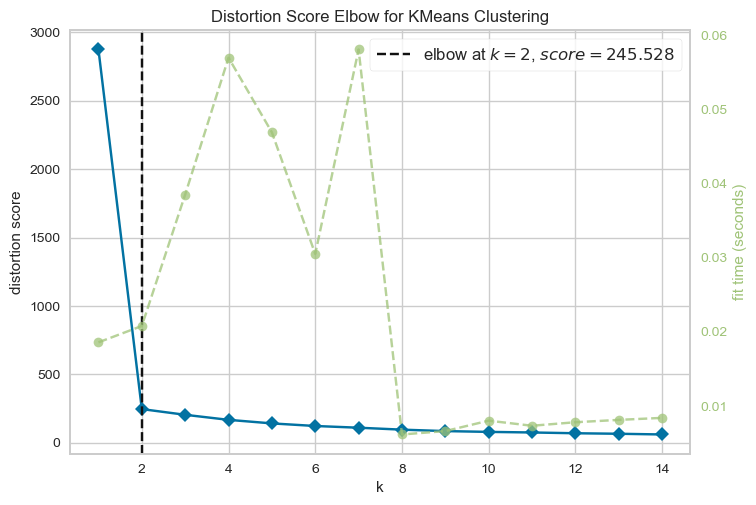

In [19]:
modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))

visual.fit(X)

visual.poof();

In [20]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [21]:
inercias=[]

for i in range(1, 10):
    
    kmeans=cluster.KMeans(n_clusters=i).fit(X)
    
    inercias.append(kmeans.inertia_)

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

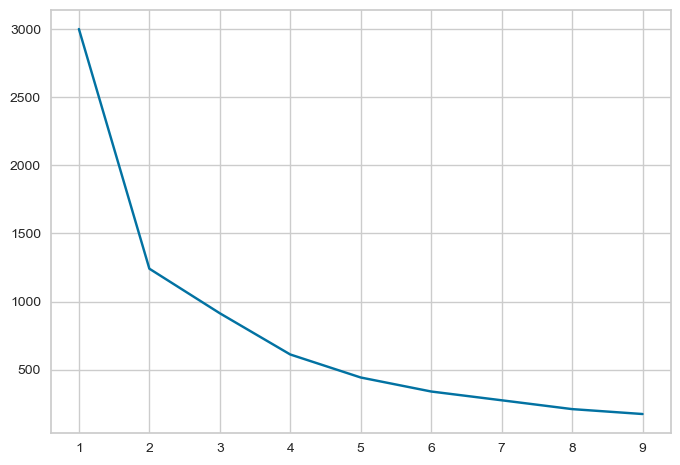

In [22]:
plt.plot(range(1, 10), inercias);

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

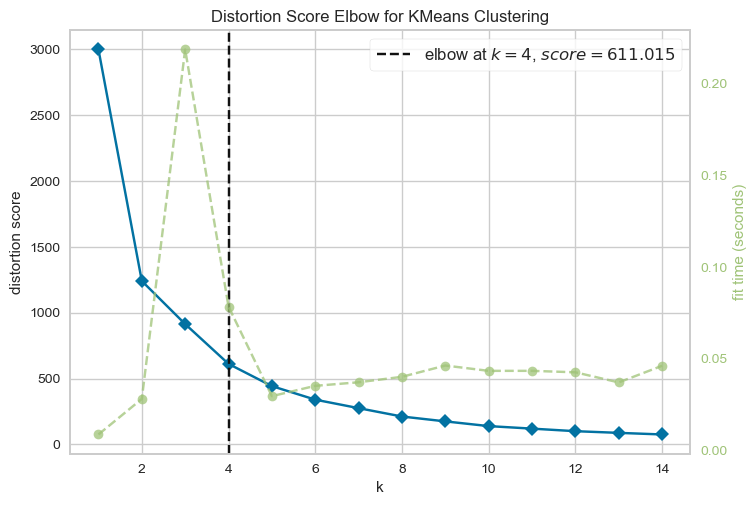

In [23]:
visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();

# Rand Score

$$R=\frac{(a+b)}{(a+b+c+d)}$$


pertece al intervalo [0,1]

Sea  S={ s_1, $\ldots{}$, s_n }; X={ x_1, $\ldots{}$, x_n } partición de S e Y={ y_1, $\ldots{}$, y_n } partición de S, entonces:

+ a:=nº de pares de elementos en S que están en el mismo subconjunto de X e Y
+ b:=nº de pares de elementos en S que están en diferentes subconjuntos de X e Y
+ c:=nº de pares de elementos en S que están en el mismo subconjunto de X y en diferente subconjunto de Y
+ d:=nº de pares de elementos en S que están en diferente subconjunto de X y en el mismo subconjunto de Y



Intuitivamente, _a+b_ es la correspondencia entre X e Y, c+d es la discordancia.


https://es.wikipedia.org/wiki/Partici%C3%B3n_de_un_conjunto

http://i3campus.co/CONTENIDOS/wikipedia/content/a/partici%25c3%25b3n_(matem%25c3%25a1tica).html#:~:text=En%20matem%C3%A1ticas%2C%20una%20partici%C3%B3n%20de,en%20subconjuntos%20disjuntos%20no%20vac%C3%ADos.

**Adjusted Rand Score**


$$AR=\frac{R - ExpectedR}{max(R) - ExpectedR}$$

In [24]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [25]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [26]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
from sklearn.metrics import adjusted_rand_score as ars

In [28]:
ars(y, y1_pred)      # jerarquico

1.0

In [29]:
ars(y, y2_pred)      # kmeans

0.49152924745353155

# Visualización de Clusters

In [30]:
X, _= datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

In [31]:
kmeans=cluster.KMeans(n_clusters=4).fit(X)

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
y_pred=kmeans.predict(X)

y_pred[:10]

array([1, 1, 1, 3, 3, 3, 0, 1, 2, 3], dtype=int32)

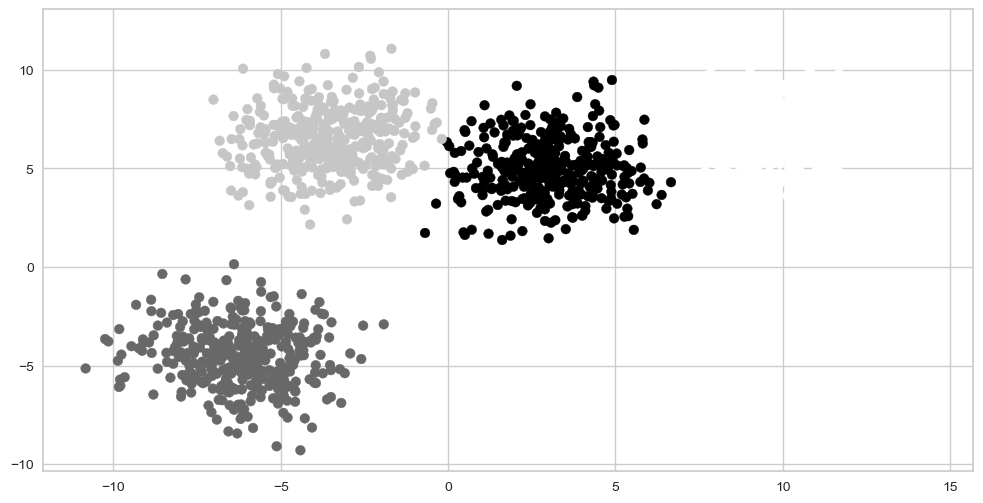

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred);

In [34]:
centers=kmeans.cluster_centers_

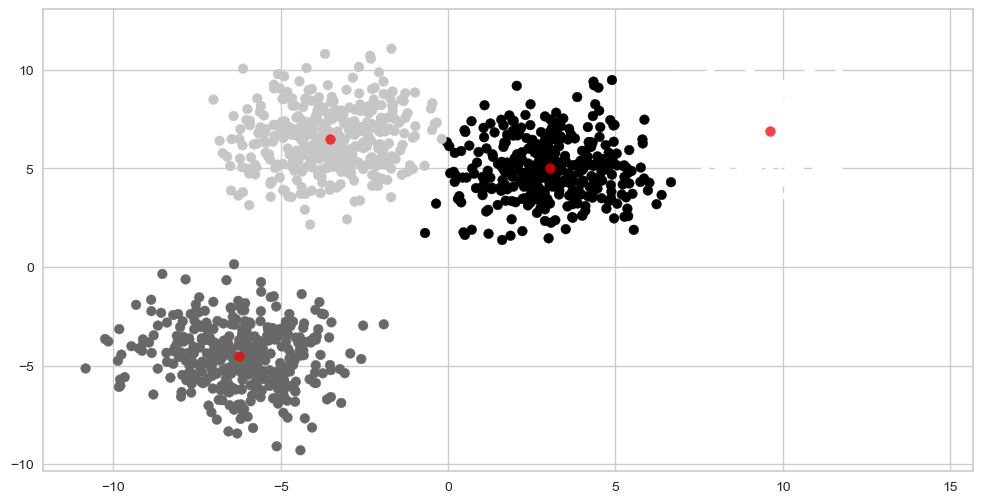

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75);

**otro plot en 3D**

In [36]:
from scipy.spatial.transform import Rotation as R

In [37]:
X, _= datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.)

X=np.c_[X, 0.5*np.random.randn(X.shape[0], 1)]

rot=R.from_euler('y', 45, degrees=True)

X=rot.apply(X)

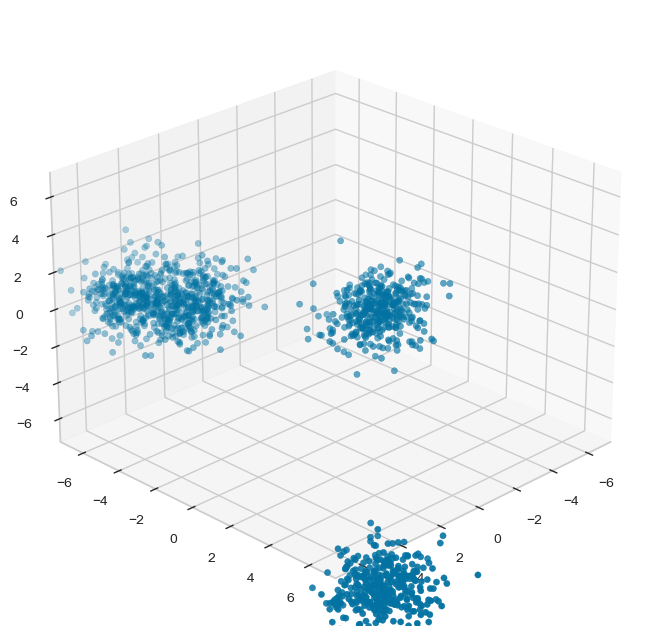

In [38]:
fig=plt.figure(figsize=(12, 8))

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=25, azim=45)
plt.show();

**reduccion de dimensiones-viz**

In [39]:
from sklearn.decomposition import PCA

In [40]:
X.shape

(1500, 3)

In [41]:
pca=PCA().fit(X)

pca_x=pca.transform(X)

pca_x.shape

(1500, 3)

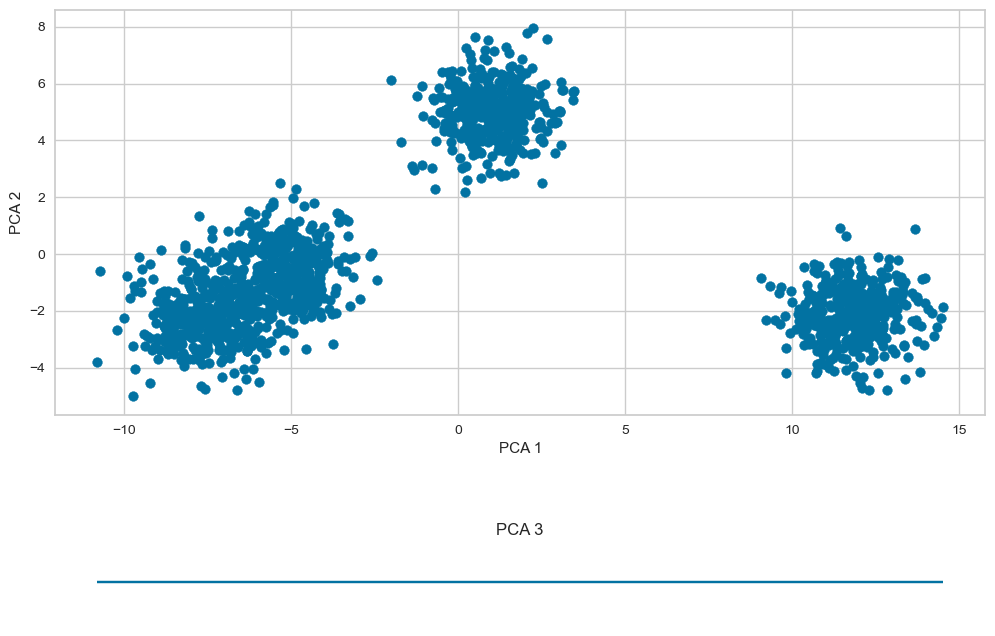

In [42]:
fig=plt.figure(figsize=(12, 8))

ax=[plt.subplot2grid((6, 1), (0, 0), rowspan=4),
    plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1])

ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();

**t-SNE**

In [43]:
from sklearn.manifold import TSNE

In [44]:
X,y = datasets.load_iris(return_X_y=True)

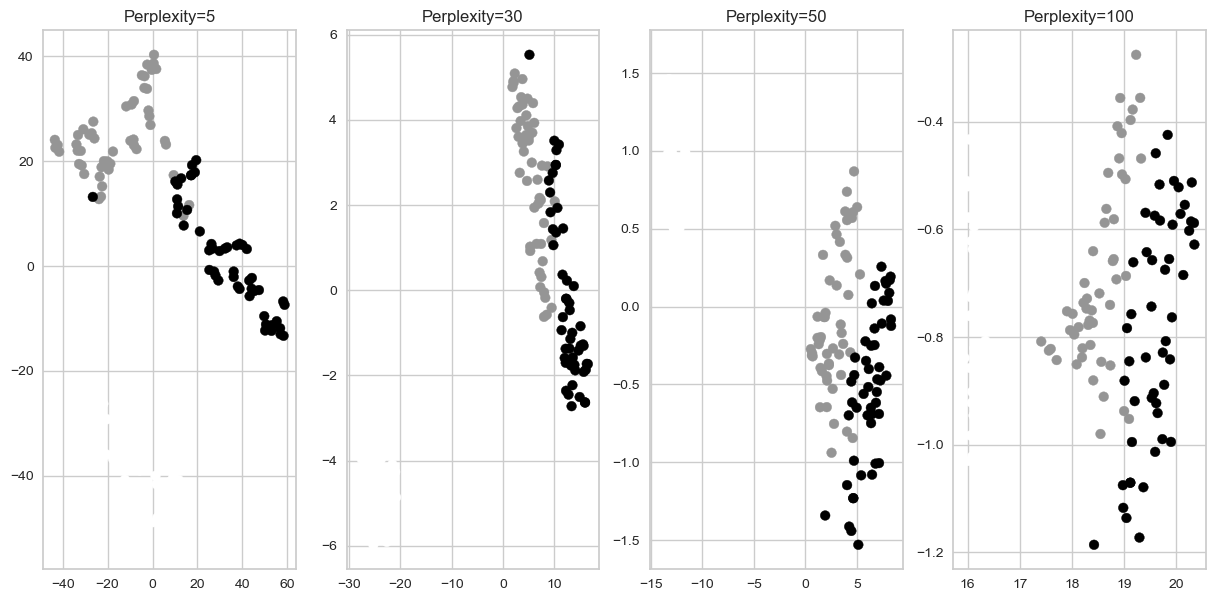

In [45]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();

**UMAP - MNIST**

In [78]:
digitos=datasets.load_digits()

digitos.data.shape

(1797, 64)

In [85]:
digitos.data[300]

array([ 0.,  0.,  1., 11., 16., 16., 10.,  0.,  0.,  0., 13., 14.,  8.,
       12., 11.,  0.,  0.,  0.,  4.,  0.,  0., 13.,  4.,  0.,  0.,  0.,
        0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9.,
        0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  7.,
       10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.])

In [84]:
digitos.target[300]

7

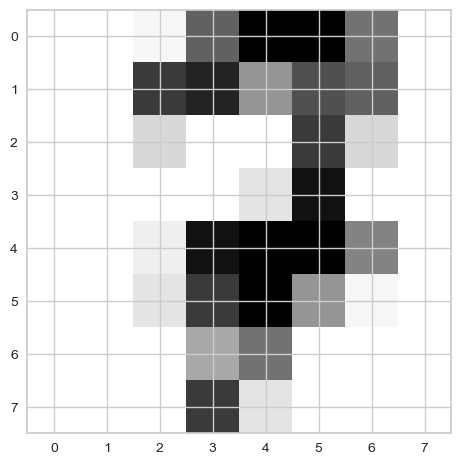

In [86]:
plt.imshow(digitos.data[300].reshape(8, 8));

In [50]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [51]:
def get_umap(data, n):
    
    umap=UMAP(n_components=n)
    emb=umap.fit_transform(data)
    
    return pd.DataFrame(emb, columns=[f'emb_{i+1}' for i in range(n)])

In [52]:
umap_df = get_umap(digitos.data, 2)

umap_df.head()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,emb_1,emb_2
0,11.506906,11.843762
1,-6.966288,8.941224
2,5.460862,4.135809
3,-0.173770,7.726142
4,2.965027,18.424698


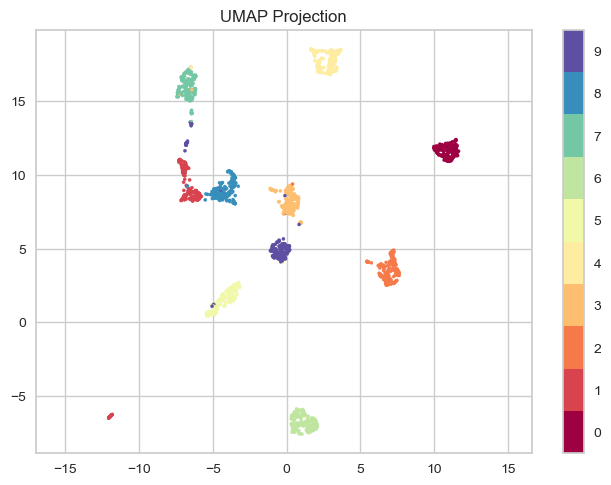

In [53]:
plt.scatter(umap_df.emb_1, 
            umap_df.emb_2, 
            c=digitos.target, 
            cmap='Spectral', 
            s=5)


plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');

**umap supervisado**

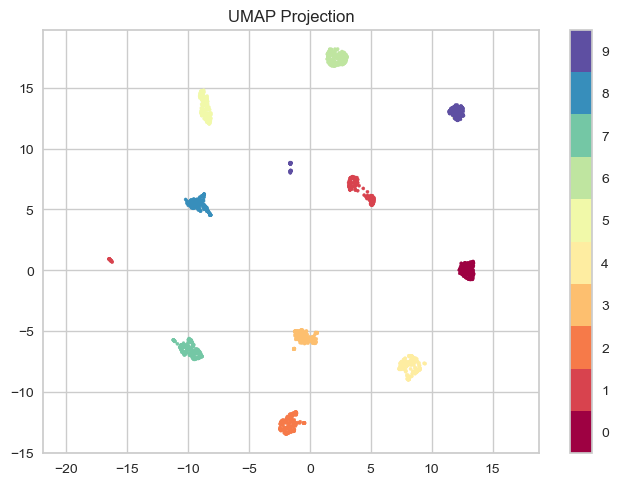

In [54]:
emb = UMAP().fit_transform(digitos.data, y=digitos.target)


umap_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])


plt.scatter(umap_df.emb_1, umap_df.emb_2, c=digitos.target, cmap='Spectral', s=5)

plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');


**umap en moons y en blobs**

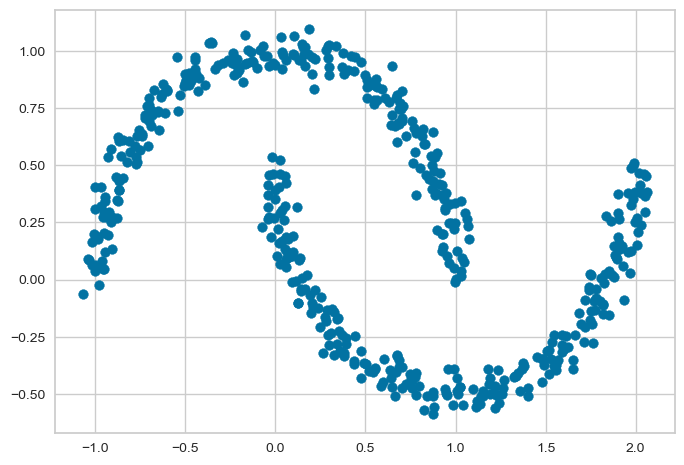

In [55]:
X,y=datasets.make_moons(n_samples=500, shuffle=True, noise=.05)

plt.scatter(X[:,0], X[:,1]);

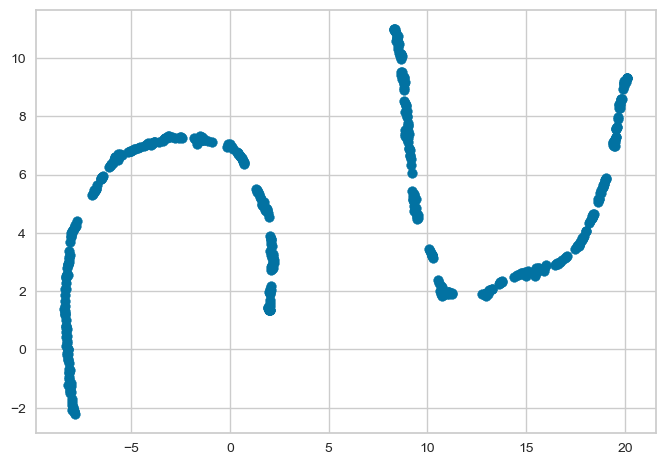

In [56]:
umap_df=get_umap(X, 2)

plt.scatter(umap_df.emb_1, umap_df.emb_2);

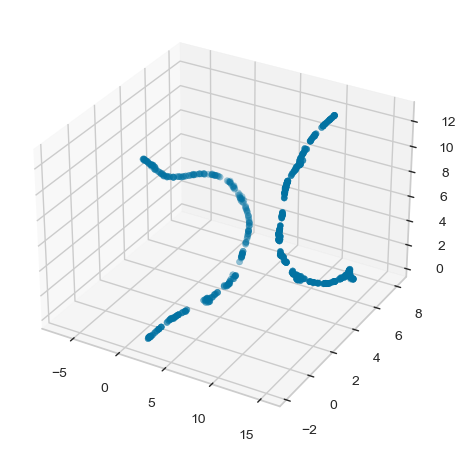

In [57]:
umap_df=get_umap(X, 3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3);

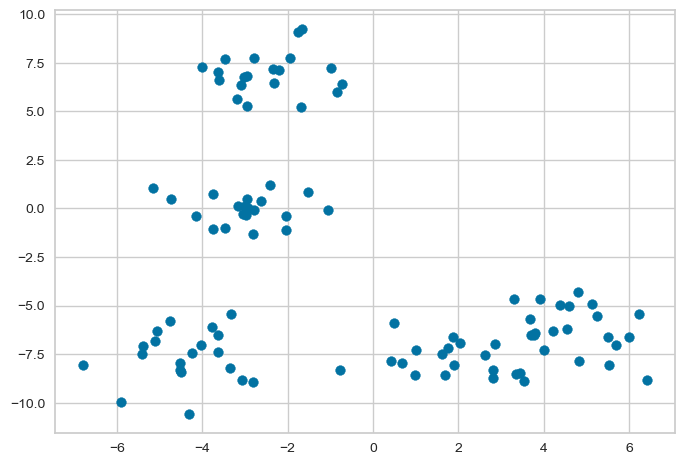

In [58]:
# blobs

X,y=datasets.make_blobs(n_features=8, centers=5)

plt.scatter(X[:,4], X[:,1]);

In [59]:
X.shape

(100, 8)

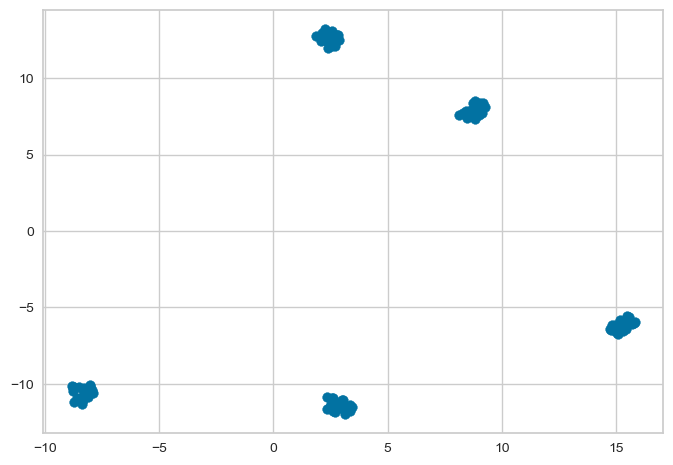

In [60]:
umap_df=get_umap(X, 2)

plt.scatter(umap_df.emb_1, umap_df.emb_2);

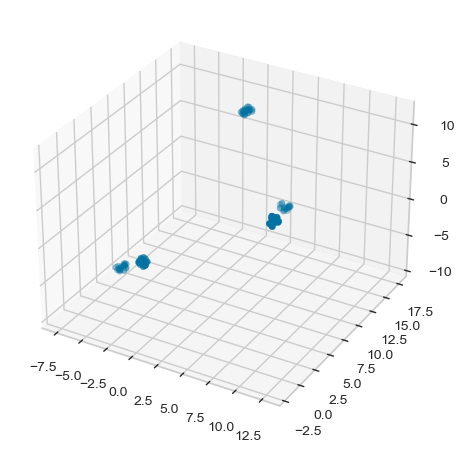

In [61]:
umap_df=get_umap(X, 3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3);

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
dbscan=DBSCAN()

pred=dbscan.fit(umap_df).labels_

In [64]:
pred

array([0, 1, 2, 3, 1, 1, 1, 1, 2, 0, 4, 0, 0, 3, 2, 0, 2, 1, 1, 2, 1, 0,
       1, 3, 4, 3, 4, 0, 4, 3, 2, 2, 0, 0, 3, 4, 2, 0, 0, 2, 4, 4, 0, 4,
       4, 2, 1, 0, 1, 2, 1, 2, 0, 4, 3, 0, 4, 1, 3, 2, 4, 3, 2, 0, 3, 0,
       3, 0, 2, 2, 4, 1, 3, 2, 1, 2, 4, 1, 3, 3, 1, 2, 1, 0, 1, 3, 2, 3,
       3, 4, 4, 4, 1, 4, 3, 4, 0, 3, 4, 3])

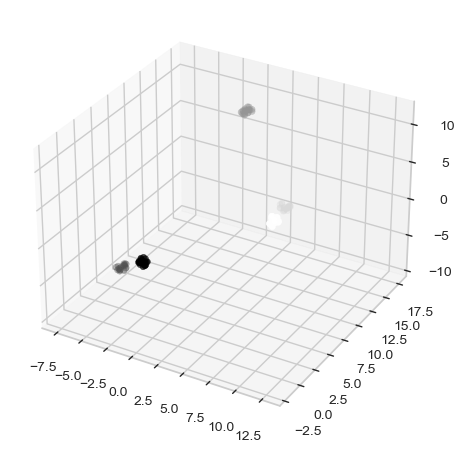

In [65]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3, c=pred);

In [66]:
ars(y, pred)

1.0

https://towardsdatascience.com/how-to-evaluate-unsupervised-learning-models-3aa85bd98aa2


https://towardsdatascience.com/evaluating-goodness-of-clustering-for-unsupervised-learning-case-ccebcfd1d4f1